# Homework w07d02 - Principal component analysis and regression

In [1]:
%matplotlib inline 

import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot') 
from sklearn import datasets
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA 

#### 1. Load the sklearn diabetes dataset. The variables are already rescaled, so you do not have to do that.

For more information on the dataset, see the original paper at 
http://web.stanford.edu/%7Ehastie/Papers/LARS/LeastAngle_2002.pdf.

In [2]:
diab = datasets.load_diabetes()

In [3]:
diab.keys()

['data', 'target']

In [4]:
df1 = pd.DataFrame(diab.data)
y1 = pd.Series(diab.target)
df1.head()

,0,1,2,3,4,5,6,7,8,9
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


In [5]:
df1.describe()

,0,1,2,3,4,5,6,7,8,9
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02
mean,-3.634285e-16,1.308343e-16,-8.045349e-16,1.281655e-16,-8.835316e-17,1.327024e-16,-4.574646e-16,3.777301e-16,-3.830854e-16,-3.412882e-16
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123996e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260974e-01,-1.377672e-01
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665645e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324879e-02,-3.317903e-02
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670611e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947634e-03,-1.077698e-03
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564384e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243323e-02,2.791705e-02
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320442e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335990e-01,1.356118e-01


In [6]:
df1.shape

(442, 10)

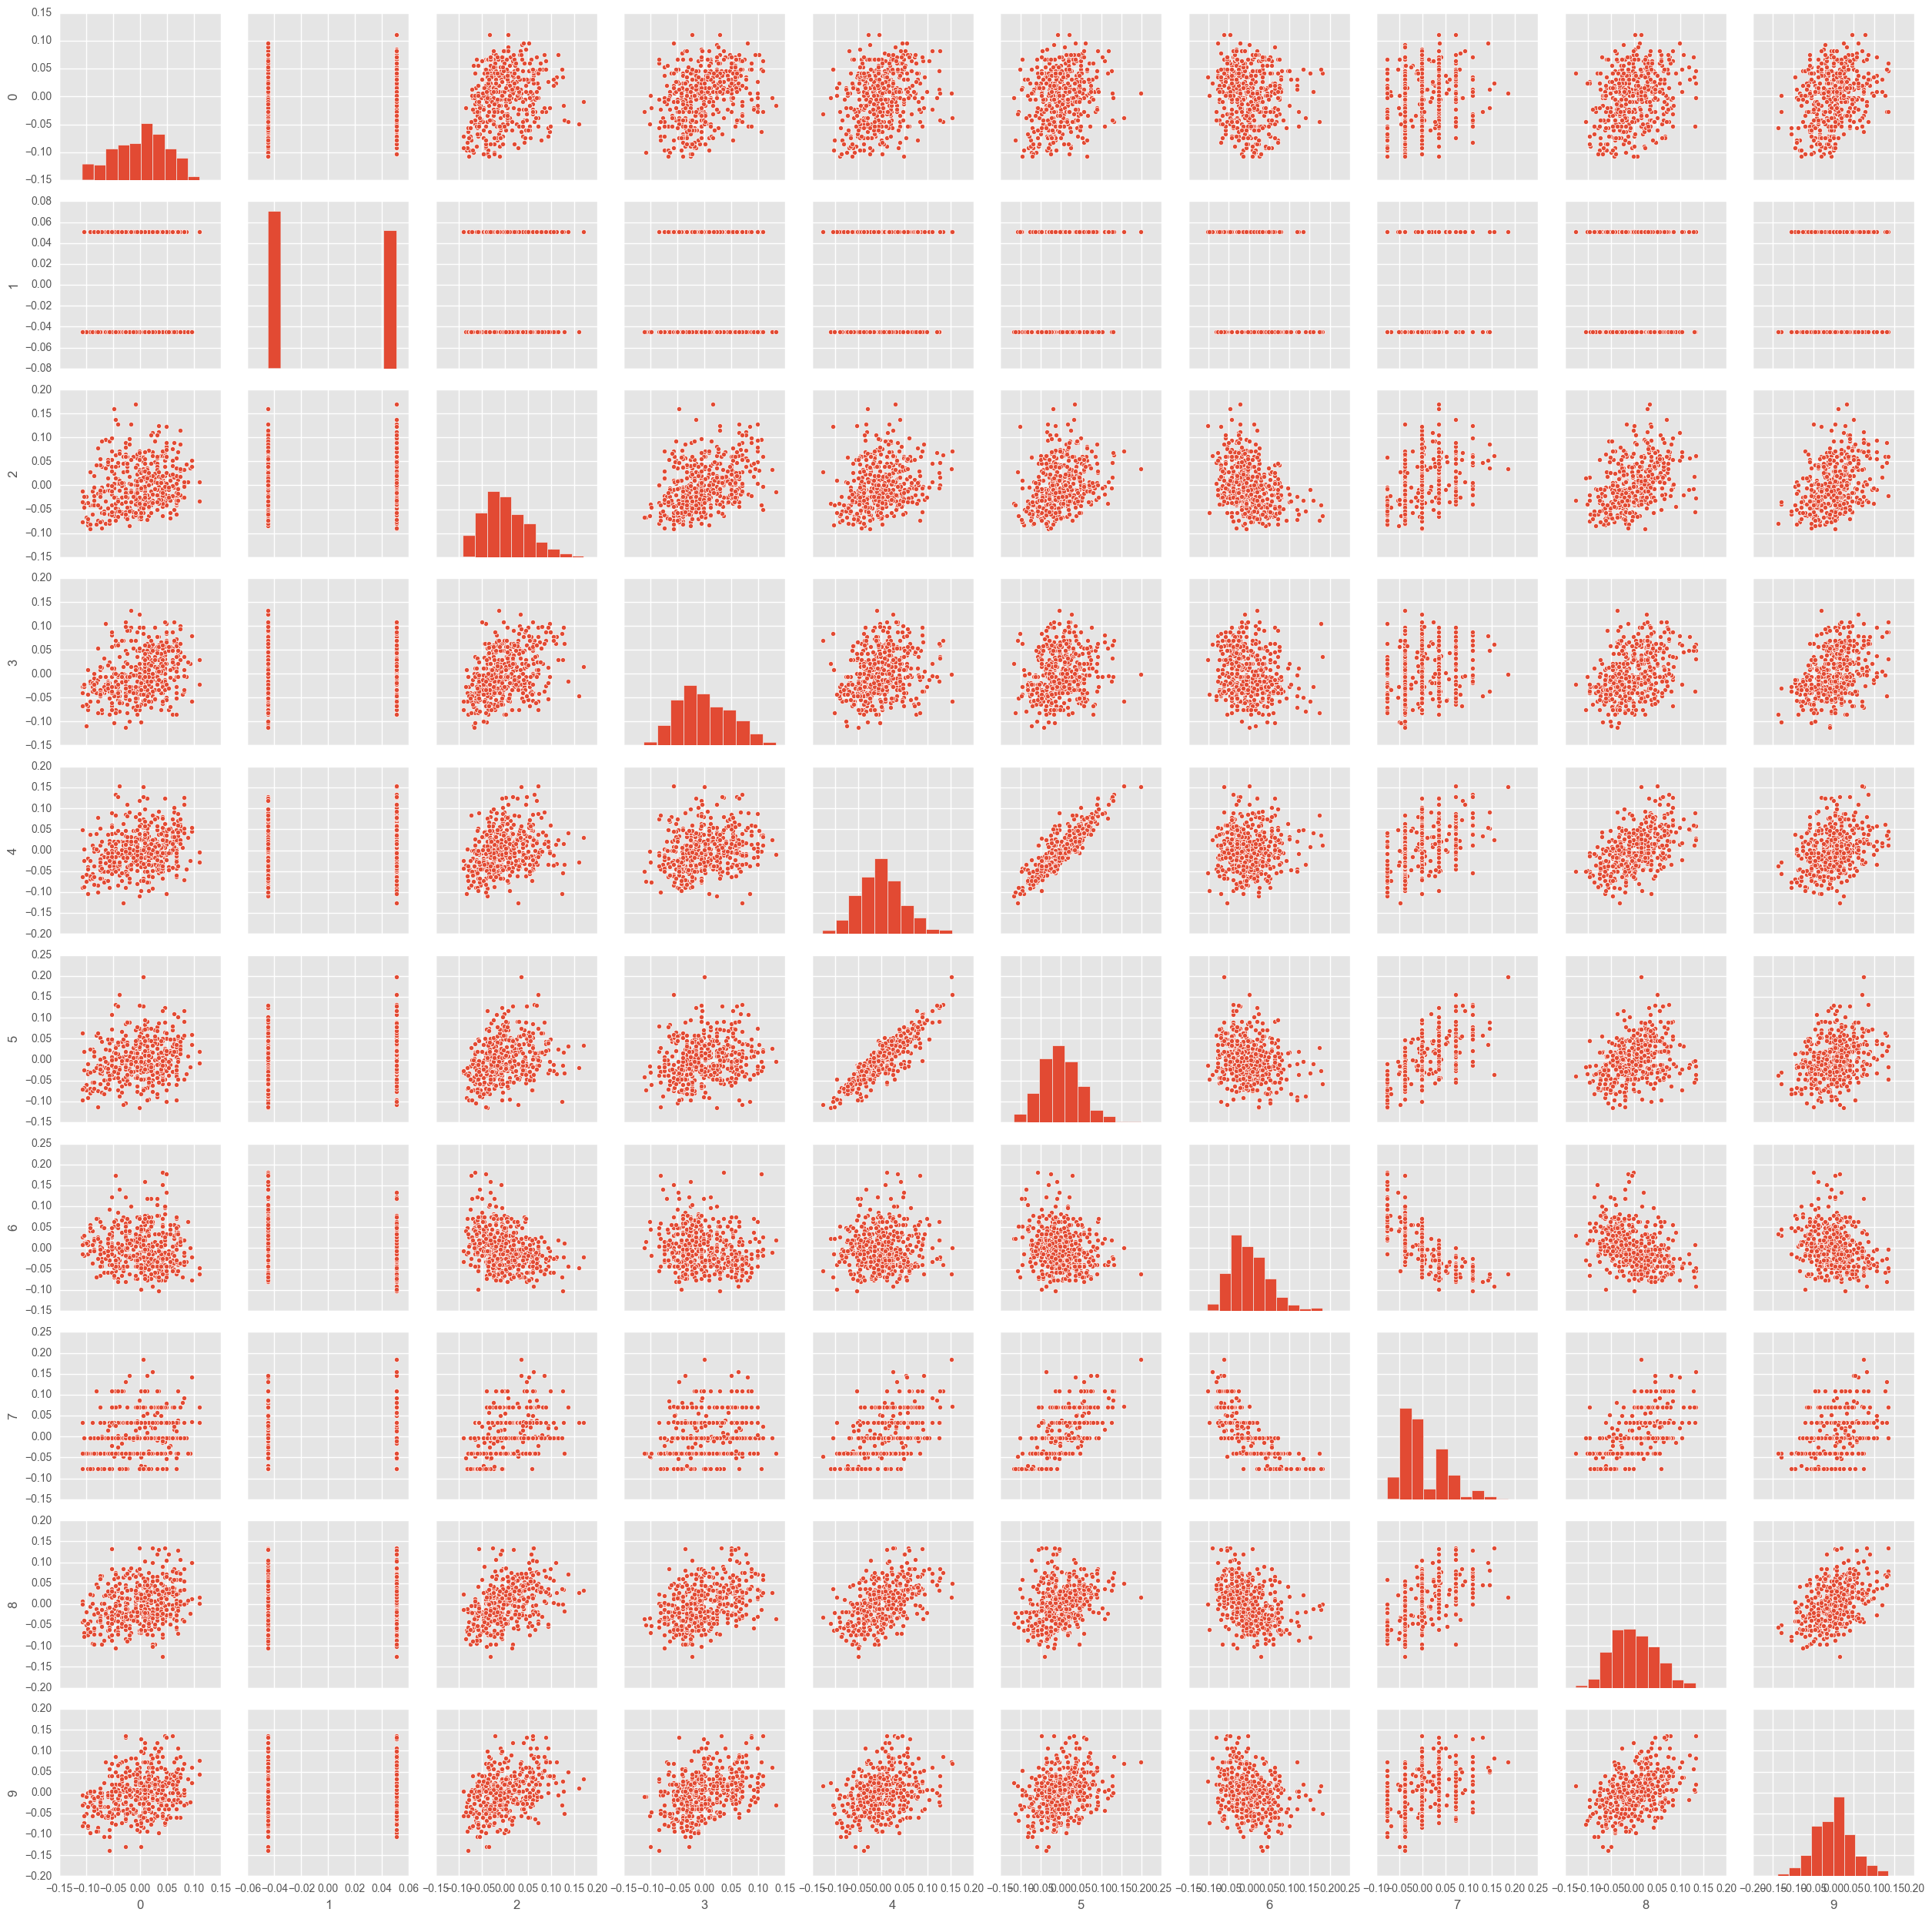

In [7]:
sns.pairplot(df1)
plt.show()

#### 2. Obtain the principle component vectors for the dataset

In [8]:
scaler = StandardScaler()
pca = PCA()
df1_pca = pca.fit_transform(df1)
df1_pca.shape

(442, 10)

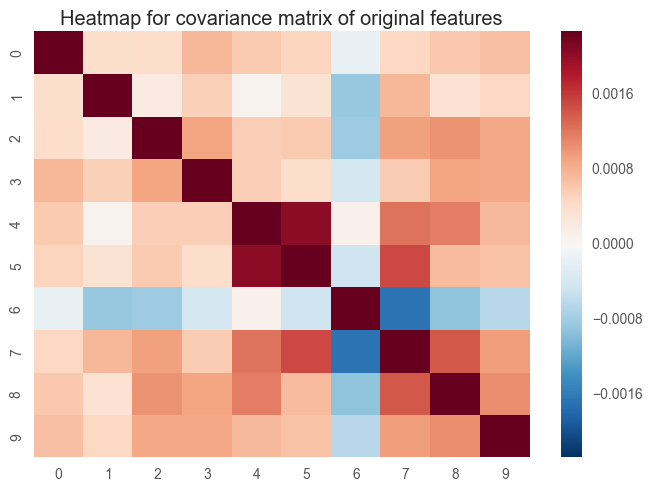

In [9]:
sns.heatmap(np.cov(df1.T))
plt.title('Heatmap for covariance matrix of original features')
plt.show()

In [10]:
print df1_pca[:2,:]

[[ 0.02793062 -0.09260116  0.02802696 -0.00393895 -0.01220663 -0.04809855
  -0.00855256  0.03602797 -0.00861296 -0.00232861]
 [-0.13468605  0.06526341  0.00132778 -0.02235559 -0.00681271 -0.04818421
   0.01067428 -0.00896163  0.0240261   0.00207334]]


In [11]:
df1.dot(pca.components_.T).iloc[:2,:]

,0,1,2,3,4,5,6,7,8,9
0,0.027931,-0.092601,0.028027,-0.003939,-0.012207,-0.048099,-0.008553,0.036028,-0.008613,-0.002329
1,-0.134686,0.065263,0.001328,-0.022356,-0.006813,-0.048184,0.010674,-0.008962,0.024026,0.002073


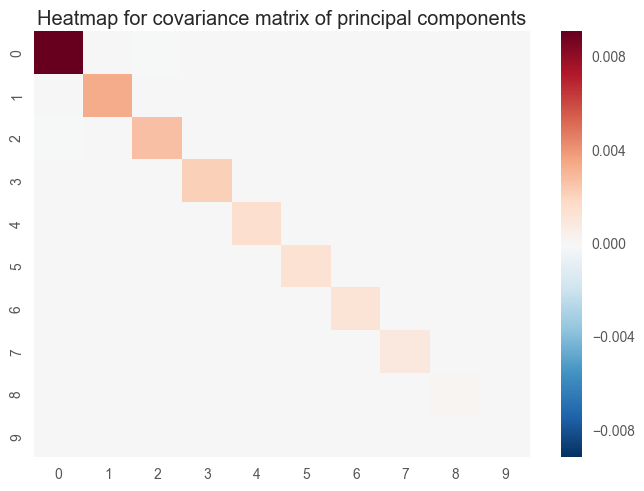

In [12]:
sns.heatmap(np.cov(df1_pca.T))
plt.title('Heatmap for covariance matrix of principal components')
plt.show()

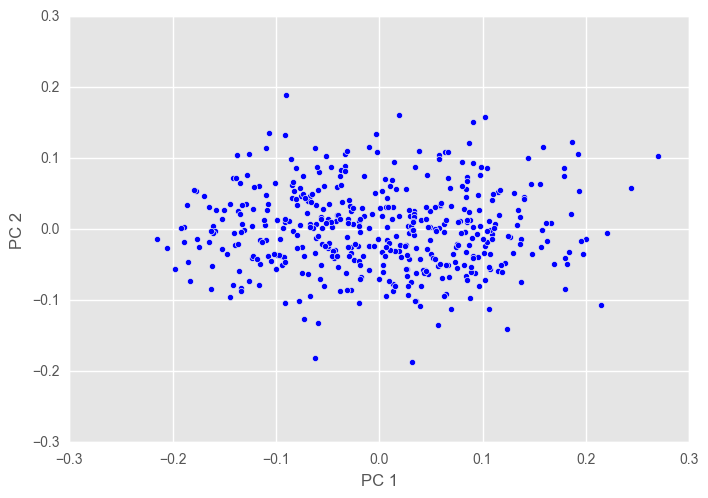

In [13]:
plt.scatter(df1_pca[:,0],df1_pca[:,1])
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.show()

#### 3. Plot the explained variance ratio for each principal component 
#### 4. Plot the cumulative sum of the explained variance ratio

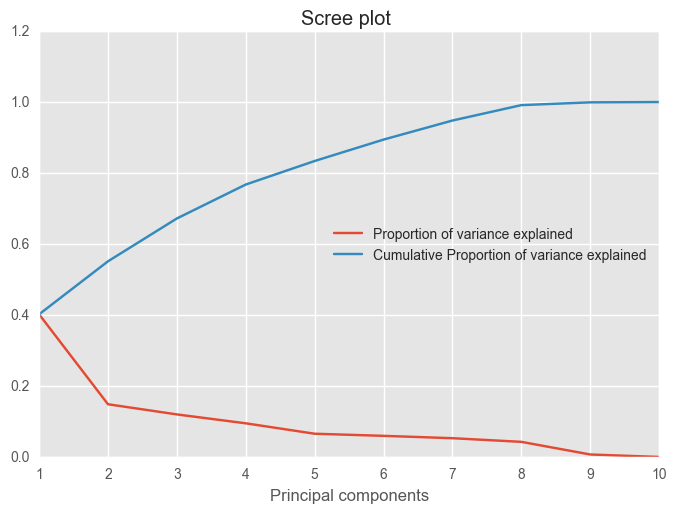

In [14]:
fig, ax = plt.subplots()
plt.plot(range(1,df1.shape[1]+1),pca.explained_variance_ratio_,
         label='Proportion of variance explained')
plt.plot(range(1,df1.shape[1]+1),np.cumsum(pca.explained_variance_ratio_),
         label='Cumulative Proportion of variance explained')
ax.legend(loc='center right')
plt.xlabel('Principal components')
plt.title('Scree plot ')
plt.show()

#### 5. Perform a linear regression fit on the principal component vectors starting with one principal component and then inlcuding more and more principal components

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
model = LinearRegression()

In [16]:
pca_mse = []
for i in range(1,df1_pca.shape[1]+1):
    X1 = df1_pca[:,0:i]
    model.fit(X1, y1)
    predictions = model.predict(X1)
    pca_mse.append((mean_squared_error(y1, predictions),
                   -cross_val_score(model,X1,y1,cv=5,
                                   scoring='neg_mean_squared_error').mean()))
    print i, " MSE:", mean_squared_error(y1, predictions)

1  MSE: 4100.97397227
2  MSE: 3878.41167762
3  MSE: 3723.54406835
4  MSE: 2963.11551596
5  MSE: 2962.69913951
6  MSE: 2918.44170717
7  MSE: 2888.58245215
8  MSE: 2882.81121287
9  MSE: 2882.07515441
10  MSE: 2859.69039877


#### 6. Compare to the MSE of models based on any single or double variables from the original features

In [17]:
list_1 = []
for i in range(df1.shape[1]):
    X1 = pd.DataFrame(df1.iloc[:,i])
    model.fit(X1, y1)
    predictions = model.predict(X1)
    list_1.append((mean_squared_error(y1,predictions),
                   -cross_val_score(model,X1,y1,cv=5,
                                   scoring='neg_mean_squared_error').mean(),
                   i))

In [18]:
list_2 = []
for i1 in range(df1.shape[1]):
    for i2 in range(i1+1,df1.shape[1]):
        X1 = df1.iloc[:,[i1,i2]]
        model.fit(X1, y1)
        predictions = model.predict(X1)
        list_2.append((mean_squared_error(y1,predictions),
                       -cross_val_score(model,X1,y1,cv=5,
                                   scoring='neg_mean_squared_error').mean(),
                       i1,i2))

In [19]:
list_3 = []
for i1 in range(df1.shape[1]):
    for i2 in range(i1+1,df1.shape[1]):
        for i3 in range(i2+1,df1.shape[1]):
                X1 = df1.iloc[:,[i1,i2,i3]]
                model.fit(X1, y1)
                predictions = model.predict(X1)
                list_3.append((mean_squared_error(y1,predictions),
                               -cross_val_score(model,X1,y1,cv=5,
                                   scoring='neg_mean_squared_error').mean(),
                               i1,i2,i3))

In [20]:
list_4 = []
for i1 in range(df1.shape[1]):
    for i2 in range(i1+1,df1.shape[1]):
        for i3 in range(i2+1,df1.shape[1]):
            for i4 in range(i3+1,df1.shape[1]):
                X1 = df1.iloc[:,[i1,i2,i3,i4]]  
                model.fit(X1, y1)
                predictions = model.predict(X1)
                list_4.append((mean_squared_error(y1,predictions),
                               -cross_val_score(model,X1,y1,cv=5,
                                   scoring='neg_mean_squared_error').mean(),
                               i1,i2,i3,i4))

In [21]:
list_5 = []
for i1 in range(df1.shape[1]):
    for i2 in range(i1+1,df1.shape[1]):
        for i3 in range(i2+1,df1.shape[1]):
            for i4 in range(i3+1,df1.shape[1]):
                for i5 in range(i4+1,df1.shape[1]):
                    X1 = df1.iloc[:,[i1,i2,i3,i4,i5]]    
                    model.fit(X1, y1)
                    predictions = model.predict(X1)
                    list_5.append((mean_squared_error(y1,predictions),
                                   -cross_val_score(model,X1,y1,cv=5,
                                   scoring='neg_mean_squared_error').mean(),
                                   i1,i2,i3,i4,i5))

In [22]:
list_6 = []
for i1 in range(df1.shape[1]):
    for i2 in range(i1+1,df1.shape[1]):
        for i3 in range(i2+1,df1.shape[1]):
            for i4 in range(i3+1,df1.shape[1]):
                for i5 in range(i4+1,df1.shape[1]):
                    for i6 in range(i5+1,df1.shape[1]):
                        X1 = df1.iloc[:,[i1,i2,i3,i4,i5,i6]]    
                        model.fit(X1, y1)
                        predictions = model.predict(X1)
                        list_6.append((mean_squared_error(y1,predictions),
                                       -cross_val_score(model,X1,y1,cv=5,
                                   scoring='neg_mean_squared_error').mean(),i1,i2,i3,i4,i5,i6))

In [23]:
list_7 = []
for i1 in range(df1.shape[1]):
    for i2 in range(i1+1,df1.shape[1]):
        for i3 in range(i2+1,df1.shape[1]):
            X1 = df1.drop([i1,i2,i3],axis=1) 
            model.fit(X1, y1)
            predictions = model.predict(X1)
            list_7.append((mean_squared_error(y1,predictions),
                           -cross_val_score(model,X1,y1,cv=5,
                                   scoring='neg_mean_squared_error').mean(),
                           i1,i2,i3))

In [24]:
list_8 = []
for i1 in range(df1.shape[1]):
    for i2 in range(i1+1,df1.shape[1]):
        X1 = df1.drop([i1,i2],axis=1) 
        model.fit(X1, y1)
        predictions = model.predict(X1)
        list_8.append((mean_squared_error(y1,predictions),
                       -cross_val_score(model,X1,y1,cv=5,
                                   scoring='neg_mean_squared_error').mean(),
                       i1,i2))

In [25]:
list_9 = []
for i1 in range(df1.shape[1]):
    X1 = df1.drop([i1],axis=1) 
    model.fit(X1, y1)
    predictions = model.predict(X1)
    list_9.append((mean_squared_error(y1,predictions),
                   -cross_val_score(model,X1,y1,cv=5,
                                   scoring='neg_mean_squared_error').mean(),
                   i1))

In [26]:
list_10 = []
X1 = df1.drop([i1],axis=1) 
model.fit(X1, y1)
predictions = model.predict(X1)
list_10.append((mean_squared_error(y1,predictions),
                -cross_val_score(model,X1,y1,cv=5,
                                   scoring='neg_mean_squared_error').mean()))

In [27]:
feat_mse = [min([l[0] for l in list_1]), min([l[0] for l in list_2]),
 min([l[0] for l in list_3]), min([l[0] for l in list_4]),
 min([l[0] for l in list_5]), min([l[0] for l in list_6]),
 min([l[0] for l in list_7]), min([l[0] for l in list_8]),
 min([l[0] for l in list_9]), min([l[0] for l in list_10])]
feat_cv = [
 min([l[1] for l in list_1]), min([l[1] for l in list_2]),
 min([l[1] for l in list_3]), min([l[1] for l in list_4]),
 min([l[1] for l in list_5]), min([l[1] for l in list_6]),
 min([l[1] for l in list_7]), min([l[1] for l in list_8]),
 min([l[1] for l in list_9]), min([l[1] for l in list_10])]

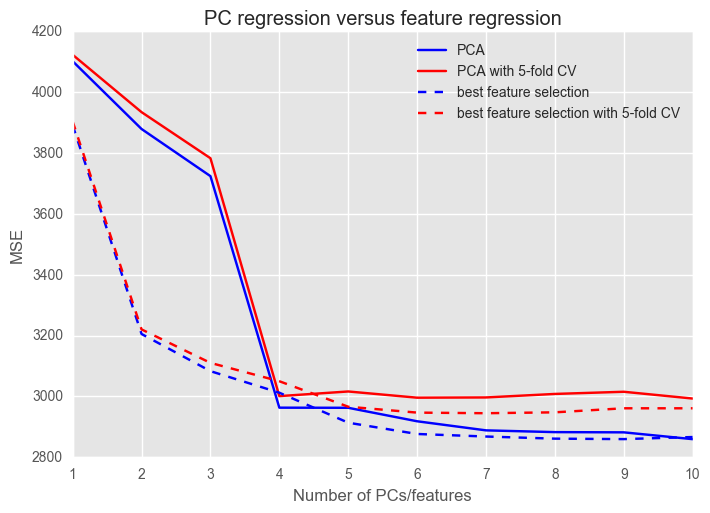

In [28]:
fig, ax = plt.subplots()
plt.plot(range(1,11),[l[0] for l in pca_mse],'b',label='PCA')
plt.plot(range(1,11),[l[1] for l in pca_mse],'r',label='PCA with 5-fold CV')
plt.plot(range(1,11),feat_mse,'b--',label='best feature selection')
plt.plot(range(1,11),feat_cv,'r--',label='best feature selection with 5-fold CV')
ax.legend(loc='upper right')
plt.title('PC regression versus feature regression')
plt.xlabel('Number of PCs/features')
plt.ylabel('MSE')
plt.show()

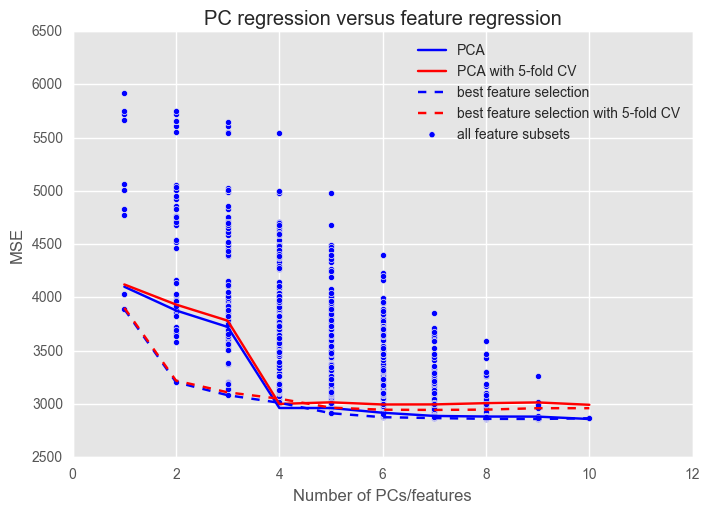

In [29]:
fig, ax = plt.subplots()
plt.plot(range(1,11),[l[0] for l in pca_mse],'b',label='PCA')
plt.plot(range(1,11),[l[1] for l in pca_mse],'r',label='PCA with 5-fold CV')
plt.plot(range(1,11),feat_mse,'b--',label='best feature selection')
plt.plot(range(1,11),feat_cv,'r--',label='best feature selection with 5-fold CV')
plt.scatter([1]*len(list_1),[l[0] for l in list_1],label='all feature subsets')
plt.scatter([2]*len(list_2),[l[0] for l in list_2])
plt.scatter([3]*len(list_3),[l[0] for l in list_3])
plt.scatter([4]*len(list_4),[l[0] for l in list_4])
plt.scatter([5]*len(list_5),[l[0] for l in list_5])
plt.scatter([6]*len(list_6),[l[0] for l in list_6])
plt.scatter([7]*len(list_7),[l[0] for l in list_7])
plt.scatter([8]*len(list_8),[l[0] for l in list_8])
plt.scatter([9]*len(list_9),[l[0] for l in list_9])
plt.scatter([10],[l[0] for l in list_10])
ax.legend(loc='upper right')
plt.title('PC regression versus feature regression')
plt.xlabel('Number of PCs/features')
plt.ylabel('MSE')
plt.show()

#### Optional: Use other regression methods

In [43]:
list_1

[(5720.5470172056475, 5788.7199511298368, 0),
 (5918.8888995860216, 5993.7123427057868, 1),
 (3890.4565854612724, 3903.0512513175213, 2),
 (4774.1029574417935, 4812.2978475260861, 3),
 (5663.3156237393541, 5721.652192615521, 4),
 (5750.2411026777827, 5822.1854805697158, 5),
 (5005.6616207106526, 5066.7127643664162, 6),
 (4831.1383864340896, 4852.1999624998243, 7),
 (4030.9931334683297, 4063.0185676678166, 8),
 (5062.3805945205422, 5127.6363788653489, 9)]